**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Régression logistique](static/06-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique a pour objectif la mise en oeuvre d'un classificateur de type régression logistique. L'algorithme d'apprentissage des paramètres utilisé sera l'**algorithme du gradient**. Cette fois-ci, le travail sera basé sur des **jeux de données simulés**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Outils divers
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm

# Helpers pour l'affichage
from helpers import plot_results

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(21,6.5)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### 1 - Lecture des jeux de données

**Exercice 1**: à l'aide de la bibiothèques *pandas*, lire les fichiers `linear.csv`, `circles.csv` et `moons.csv`

In [4]:
# Compléter le code ci-dessous ~ 1 ligne
df_linear = pd.read_csv('../../data/linear.csv')

In [5]:
# Compléter le code ci-dessous ~ 1 ligne
df_circles = pd.read_csv('../../data/circles.csv')

In [6]:
# Compléter le code ci-dessous ~ 1 ligne
df_moons = pd.read_csv('../../data/moons.csv')

### 2 - Affichage des jeux de données

La première étape avant toute étude d'apprentissage supervisé est de visualiser les données (cf. cours de Visualisation des données). Cette étape est faite ici pour vous.

Text(0.5, 1.0, 'Lunes')

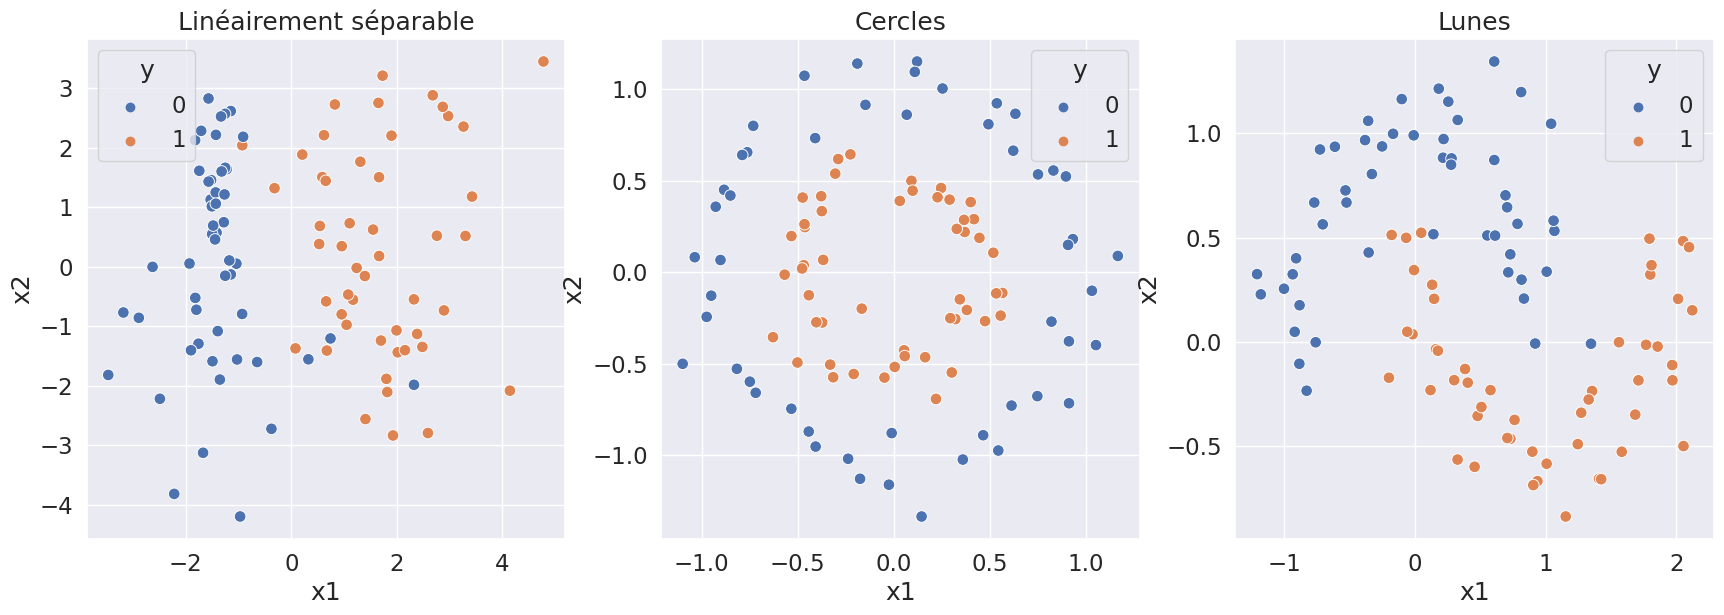

In [7]:
f, axes = plt.subplots(1, 3)
sns.scatterplot(x='x1', y='x2', hue="y", data=df_linear, ax=axes[0], s=70)
axes[0].set_title("Linéairement séparable")
sns.scatterplot(x='x1', y='x2', hue="y", data=df_circles, ax=axes[1], s=70)
axes[1].set_title("Cercles")
sns.scatterplot(x='x1', y='x2', hue="y", data=df_moons, ax=axes[2], s=70)
axes[2].set_title("Lunes")

### 3 - Jeu de données #1 - Données linéairement séparables

**Exercice 2**: Construire la matrice des prédicteurs X (design matrix) et le vecteur y (réponse) pour le jeu de données linéairement séparable.<br/>
<strong style="color:red">Pour la dimension de X, nous suivrons ici la convention n x m</strong>

In [19]:
# Compléter le code ci-dessous ~ 5 lignes
x0 = np.ones(shape=(len(df_linear)))
x1 = df_linear['x1'].values
x2 = df_linear['x2'].values
X = np.stack((x0,x1,x2), axis=0)

y = df_linear['y'].values.reshape(-1,1)

<strong style='color: green'>TEST - Le code ci-dessous vous permet de tester les formes de `X` et de `y`. Les `assert` ne doivent pas renvoyer d'exception</strong>

In [9]:
assert X.shape == (3,100)
assert y.shape == (100,1)

**Exercice 3**: compléter la fonction logistique (ou sigmoïde) ci-dessous. Pour rappel, la fonction logistique (ou sigmoïde) est de la forme

$g(z)=\frac{1}{1+e^{-z}}$

In [8]:
def sigmoid(z):
    # Compléter le code ci-dessous ~ 1 ligne
    s = 1 / (1 + np.exp(-z))
    return s

<strong style='color: green'>TEST - Le code ci-dessous vous permet de tester votre fonction `sigmoid`. Les `assert` ne doivent pas renvoyer d'exception</strong>

In [11]:
assert(sigmoid(0) == 0.5)
assert(sigmoid(np.log(3)) == 0.75)

**Exercice 4**: compléter la fonction ci-dessous représentant le modèle de régression logistique

Pour rappel, l'hypothèse utilisée ici est:

$h_{\theta}(x)=g(\theta^Tx)$

où $g$ est la fonction (ou sigmoïde)

In [10]:
def hypothesis(X, theta):
    assert X.shape[0] == theta.shape[0] # Vérifie que la multiplication va être possible (n x 1)T x (n x m) => (1 x m) 
    # Compléter le code ci-dessous ~ 1 ligne
    h = sigmoid(np.dot(theta.T, X))
    return h

<strong style='color: green'>TEST - Le code ci-dessous vous permet de tester votre fonction `hypothesis`. Le `assert` ne doit pas renvoyer d'exception</strong>

In [11]:
X_test = np.array([[1,1,0,-1],[2,2,1,-1]]) # 2 x 4
theta_test = np.array([1,2]).reshape(-1,1) # 4 x 1
h = hypothesis(X_test, theta_test)
assert h.shape == (1,4)
h

array([[0.99330715, 0.99330715, 0.88079708, 0.04742587]])

Vous devriez obtenir le array suivant:<br/>
```array([[0.99330715, 0.99330715, 0.88079708, 0.04742587]])```

**Exercice 5**: compléter la fonction de coût ci-dessous

Pour rappel, la fonction de coût en régression logistique est:

$J(\theta) = -\frac{1}{m}\times \sum\limits_{i=1}^{m}y^{(i)}\times\text{log}(h_\theta(x))+(1-y^{(i)})\times\text{log}(1-h_\theta(x))$

In [13]:
def cost_function(X,y, theta):
    #print("X.shape: ", X.shape)
    #print("y: ", y)
    #print("theta.shape: ", theta.shape)
    # Compléter le code ci-dessous ~ 1-4 lignes
    cost = -np.sum((y* np.log(hypothesis(X, theta)).T) + (1-y) * (np.log(1 - hypothesis(X, theta)).T)) / y.shape[0]
    return cost

In [14]:
X_test = np.array([[1,1,0,-1],[2,2,1,-1]])
theta_test = np.array([1,2]).reshape(-1,1)
y_test = np.array([0,1,0,1]).reshape(-1,1)
cost = cost_function(X_test, y_test, theta_test)
cost

2.547236514898742

Vous devriez obtenir ~ 2.54

**Exercice 6**: Compléter l'algorithme du gradient ci-dessous:

Pour rappel, l'algorithme du gradient est de la forme:

$
\text{Répéter pendant n_iterations}
\{\\
\theta_{j}:= \theta_{j} - \alpha\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\times x_{j}^{(i)}\quad\forall j
\\
\}
$


In [17]:
def gradient_descent(X, y, theta, alpha = 0.01, n_iterations = 10):

    history = defaultdict(list)
    m = len(y)
    for i in tqdm(range(0, n_iterations)):
    
        # Compléter le code ci-dessous ~ 2 lignes
        d_theta = np.dot((hypothesis(X, theta)-y.T), X.T)        
        theta = theta - (alpha*d_theta.T)
        

        # Sauvegarde des valeurs intermédiaires de theta et du coût
        if i%50 == 0:
            cost = cost_function(X, y, theta)
            history['theta'].append(theta)
            history['cost'].append(cost)
        
    return theta, history

In [20]:
# Compléter le code ci-dessous
theta = np.zeros(shape = (X.shape[0],1))
alpha = 0.01
n_iterations = 5

theta, history = gradient_descent(X,y, theta, alpha, n_iterations)
theta

100%|██████████| 5/5 [00:00<00:00, 9558.58it/s]


array([[-0.05073531],
       [ 1.4559186 ],
       [ 0.18210166]])

Vous devriez obtenir le vecteur $\theta$ suivant:<br/>
```
array([[-0.20182053],
       [ 3.20516816],
       [ 1.03975638]])```

#### Affichage des résultats

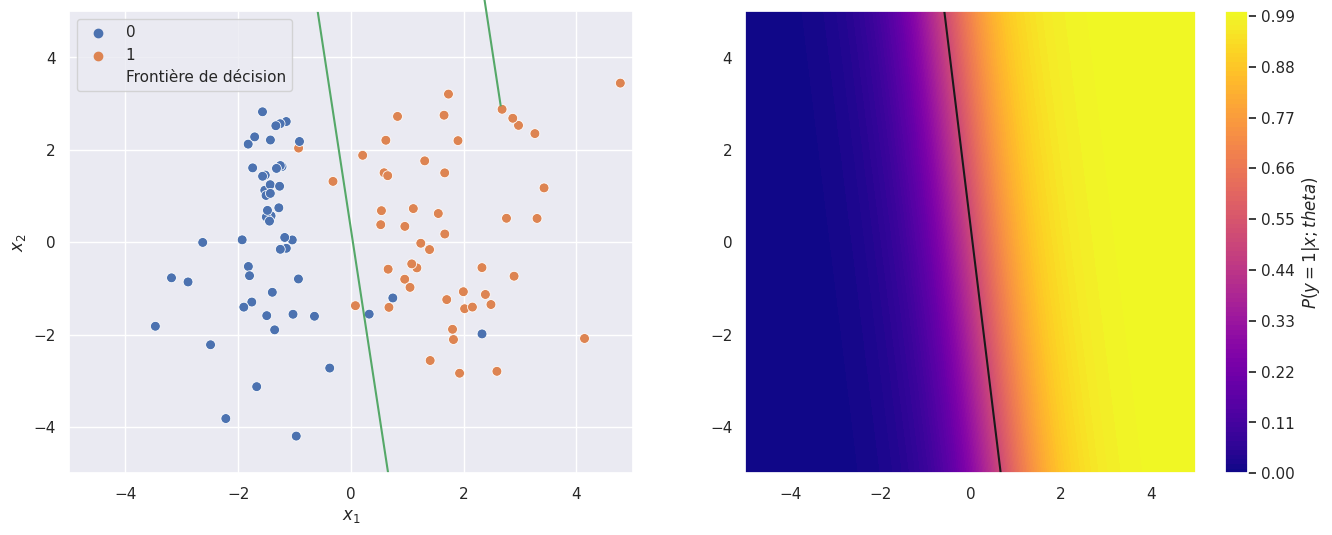

In [21]:
sns.set(rc={'figure.figsize':(16,6)})
f, axes = plt.subplots(1,2)
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx,yy)
F = theta[0] + theta[1]*XX + theta[2]*YY
plot_results(X,y,XX,YY,F, sigmoid(F), axes)

### 4 - Jeu de données #2 - Cercles

**Exercice 7**: Effectuer une régression logistique sur le jeu de données **circles**

In [27]:
# Compléter le code ci-dessous ~ quelques lignes
# Compléter le code ci-dessous ~ 5 lignes
x0 = np.ones(len(df_circles))

x1 = df_circles['x1'].values
x2 = df_circles['x2'].values
x3 = x1**2
x4 = x2**2


X = np.stack((x0,x1,x2, x3, x4), axis=0)
y = df_circles['y'].values.reshape(-1,1)

theta = np.zeros(shape = (X.shape[0],1))
alpha = 0.01
n_iterations = 100000
theta, history = gradient_descent(X,y,theta, alpha)
theta

100%|██████████| 10/10 [00:00<00:00, 12756.40it/s]


array([[ 0.33467197],
       [-0.04591895],
       [-0.02581404],
       [-0.72332774],
       [-0.82296293]])

#### Affichage des résultats

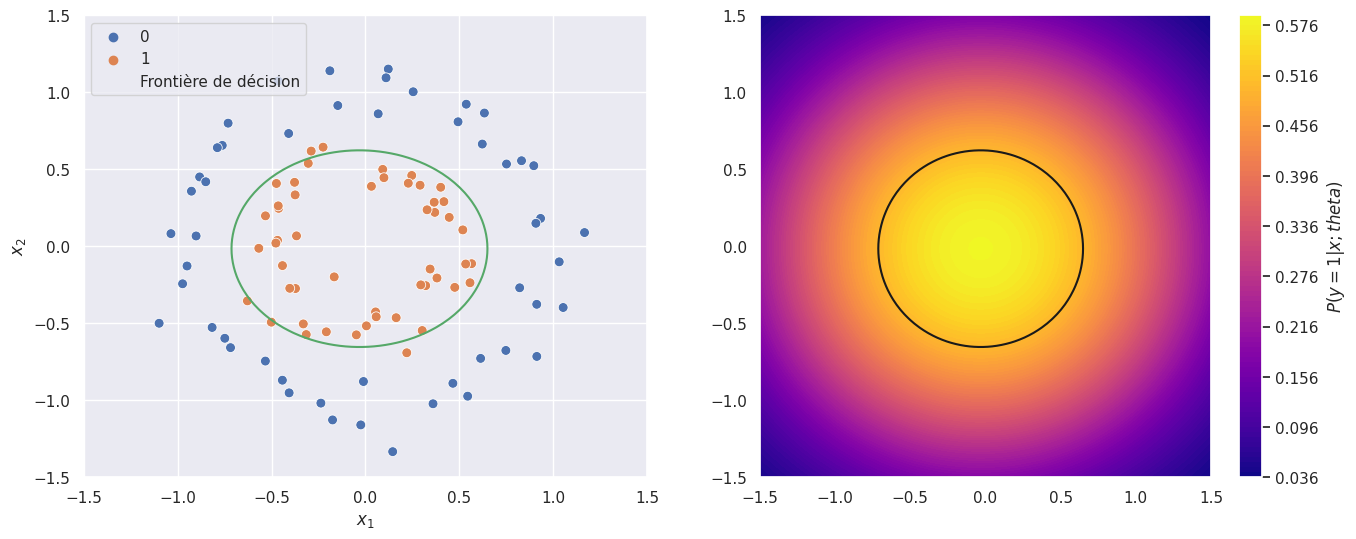

In [28]:
sns.set(rc={'figure.figsize':(16,6)})
f, axes = plt.subplots(1,2)
xx = np.linspace(-1.5, 1.5, 100)
yy = np.linspace(-1.5, 1.5, 100)
XX, YY = np.meshgrid(xx,yy)
F = theta[0] + theta[1]*XX + theta[2]*YY + theta[3]*XX**2 + theta[4]*YY**2
plot_results(X,y,XX,YY,F, sigmoid(F), axes)

### 5 - Jeu de données #3 - Lunes

**Exercice 7**: Effectuer une régression logistique sur le jeu de données **moons**

In [122]:
# Compléter le code ci-dessous ~ quelques lignes
x0 = np.ones(len(df_moons))

x1 = df_moons['x1'].values
x2 = df_moons['x2'].values
x3 = x1**2
x4 = x2**2
x5 = x1**5
x6 = x2**7


X = np.stack((x0,x1,x2, x3, x4, x5, x6), axis=0)
y = df_moons['y'].values.reshape(-1,1)

theta = np.zeros(shape = (X.shape[0],1))
alpha = 0.1
n_iterations = 100000
theta, history = gradient_descent(X,y,theta, alpha)
theta

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_3358/2075101407.py:6: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum((y* np.log(hypothesis(X, theta)).T) + (1-y) * (np.log(1 - hypothesis(X, theta)).T)) / y.shape[0]
/tmp/ipykernel_3358/2075101407.py:6: RuntimeWarning: invalid value encountered in multiply
  cost = -np.sum((y* np.log(hypothesis(X, theta)).T) + (1-y) * (np.log(1 - hypothesis(X, theta)).T)) / y.shape[0]
100%|██████████| 10/10 [00:00<00:00, 4374.99it/s]


array([[ 1.64641481],
       [-3.98722931],
       [-4.92886127],
       [-4.77417778],
       [-2.01069553],
       [11.5738359 ],
       [-3.02395406]])

In [118]:
df_moons.head()

,Unnamed: 0,x1,x2,y
0,0,-0.010944,0.989785,0
1,1,1.967499,-0.110922,1
2,2,0.918923,-0.007878,0
3,3,-0.019781,0.036742,1
4,4,0.897047,-0.526043,1


In [104]:
X.shape

(6, 100)

#### Affichage des résultats

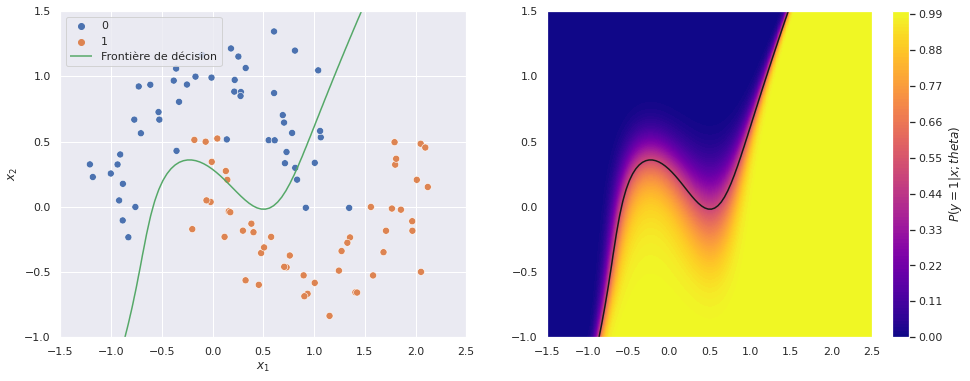

In [123]:
sns.set(rc={'figure.figsize':(16,6)})
f, axes = plt.subplots(1,2)
xx = np.linspace(-1.5, 2.5, 100)
yy = np.linspace(-1, 1.5, 100)
XX, YY = np.meshgrid(xx,yy)
F = theta[0] + theta[1]*XX + theta[2]*YY + theta[3]*XX**2 + theta[4]*YY**2 + theta[5]*XX**3 + theta[6]*YY**3
plot_results(X,y,XX,YY,F, sigmoid(F), axes)

### Fin du TP